In [15]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from random import randint


from classes import ALTURAS, COLUNAS
from classes.gerente import GerenteRemocao
from classes.patio import Container, Pilha, Patio

NCONTAINERS = 20000


def gera_containers_transito(n=NCONTAINERS):
    tempos =  np.random.normal(20, 5, NCONTAINERS)
    containers_transito = [Container('{:05d}'.format(numero), tempos[i]) 
                       for i, numero in enumerate(range(1, NCONTAINERS))] 
    return containers_transito

def gera_agendamento_containers(containers_transito, dias=30, qtdedia=200, erro=2):
    agendamentos = defaultdict(list)
    container_por_tempo = defaultdict(list)
    for c in containers_transito:
        container_por_tempo[int(c.time_to_leave)].append(c)
    for dia in range(1, dias):
        tempos_dia = np.random.normal(0, erro, qtdedia) + dia
        for t in tempos_dia:
            containers = container_por_tempo[int(t)]
            if containers:
                container_transito = containers.pop(randint(0, len(containers) - 1))
                if container_transito:
                    agendamentos[dia].append(container_transito)
    return agendamentos
        
    

[00001, 00002, 00003, 00004, 00005, 00006, 00007, 00008, 00009, 00010]


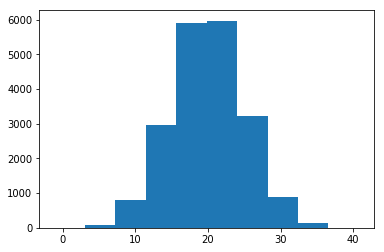

In [16]:
containers_transito = gera_containers_transito()
plt.hist([c.time_to_leave for c in containers_transito])
print(containers_transito[:10])

3781


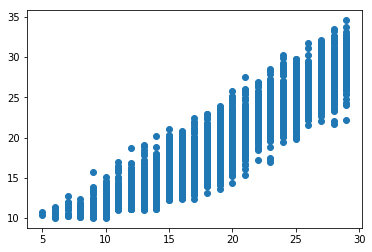

In [32]:
containers_agendados = gera_agendamento_containers(containers_transito)

x = []
y = []
for dia, containers in containers_agendados.items():
    for c in containers:
        x.append(dia)
        y.append(c.time_to_leave)
    
plt.scatter(x, y)
print(len(x))

In [21]:
patio = Patio()
gerente = GerenteRemocao(patio)
gerente.add_container(containers_transito[0])

Add pilha 0001 
A 1 None 00001


'A1'

In [22]:
print(patio._pilhas)

OrderedDict([('0001', <classes.patio.Pilha object at 0x7f59b3cc36d8>)])


In [23]:
for coluna in patio._pilhas['0001']._pilha.items():
    print(coluna)

('A', OrderedDict([('1', 00001), ('2', None), ('3', None), ('4', None), ('5', None)]))
('B', OrderedDict([('1', None), ('2', None), ('3', None), ('4', None), ('5', None)]))
('C', OrderedDict([('1', None), ('2', None), ('3', None), ('4', None), ('5', None)]))
('D', OrderedDict([('1', None), ('2', None), ('3', None), ('4', None), ('5', None)]))
('E', OrderedDict([('1', None), ('2', None), ('3', None), ('4', None), ('5', None)]))
('F', OrderedDict([('1', None), ('2', None), ('3', None), ('4', None), ('5', None)]))


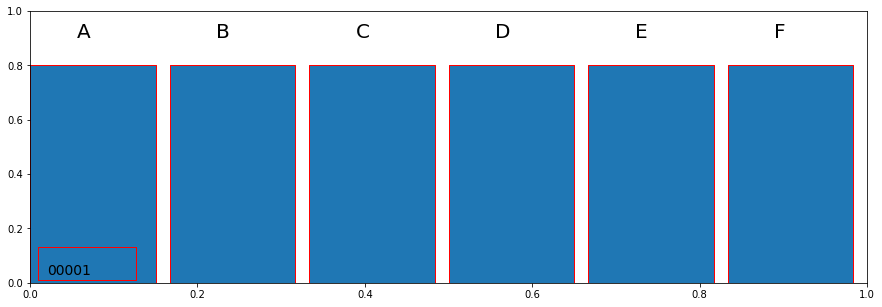

In [24]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle


def plot_patio(patio):
    fig = plt.figure(figsize=(15, 5))
    ax = plt.subplot(111)
    passo_x = 1 / len(COLUNAS)
    passo_y = .8 / len(ALTURAS)
    boxes = []
    for c, coluna in enumerate(patio._pilhas['0001']._pilha.items()):
        rect = Rectangle((passo_x * c, 0), passo_x*.9, .8)
        boxes.append(rect)
        posicao_x = passo_x * c
        ax.text(passo_x * c + (passo_x /3), .9, coluna[0], fontsize=20)
        for altura, container in coluna[1].items():
            if container is not None:
                posicao_y = passo_y * (int(altura) - 1) + .01
                ax.text(posicao_x + .02, posicao_y + .02,
                        container, fontsize=14)
                rect = Rectangle((posicao_x + .01,
                                  posicao_y),
                                 passo_x * .7, .12)

                boxes.append(rect)

    pc = PatchCollection(boxes, edgecolor='r')
    ax.add_collection(pc)
plot_patio(patio)

Add pilha 0001 
A 1 None 00001
A 2 None 00002
A 3 None 00003
A 4 None 00004
A 5 None 00005
B 1 None 00006
B 2 None 00007
B 3 None 00008
B 4 None 00009
B 5 None 00010
C 1 None 00011
C 2 None 00012
C 3 None 00013
C 4 None 00014
C 5 None 00015
D 1 None 00016
D 2 None 00017
D 3 None 00018
D 4 None 00019
D 5 None 00020
E 1 None 00021


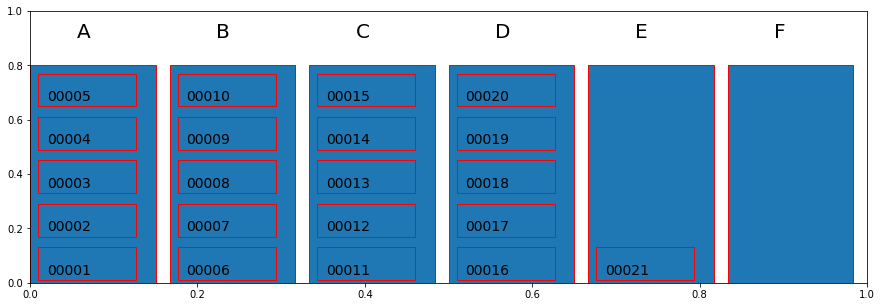

In [25]:
patio = Patio()
gerente = GerenteRemocao(patio)
for i in range(21):
    gerente.add_container(containers_transito[i])
plot_patio(patio)

4380


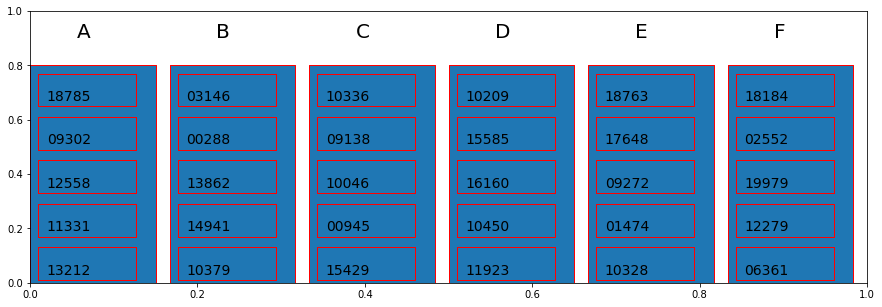

In [35]:
containers_transito = gera_containers_transito()
containers_agendados = gera_agendamento_containers(containers_transito)
patio = Patio()
gerente = GerenteRemocao(patio)
qtde = 0
for dia, containers in containers_agendados.items():
    for c in containers:
        qtde += 1
        containers_transito.pop(containers_transito.index(c))
        pilha = gerente.pilha_mesmo_tempo(c)
        nome_pilha = None
        if pilha:
            nome_pilha = pilha._nome
        gerente.add_container(c, nome_pilha)
print(qtde)
plot_patio(patio)

In [36]:
gerente._patio._pilhas

OrderedDict([('0001', <classes.patio.Pilha at 0x7f59b63dcd68>),
             ('0002', <classes.patio.Pilha at 0x7f59b63dcc50>),
             ('0003', <classes.patio.Pilha at 0x7f59b4203048>),
             ('0004', <classes.patio.Pilha at 0x7f59b4163cc0>),
             ('0005', <classes.patio.Pilha at 0x7f59b41637b8>),
             ('0006', <classes.patio.Pilha at 0x7f59b40c4d68>),
             ('0007', <classes.patio.Pilha at 0x7f59b40c4978>),
             ('0008', <classes.patio.Pilha at 0x7f59b412c630>),
             ('0009', <classes.patio.Pilha at 0x7f59b412c160>),
             ('0010', <classes.patio.Pilha at 0x7f59b6591160>),
             ('0011', <classes.patio.Pilha at 0x7f59b65913c8>),
             ('0012', <classes.patio.Pilha at 0x7f59b67dc0f0>),
             ('0013', <classes.patio.Pilha at 0x7f59b67dc0b8>),
             ('0014', <classes.patio.Pilha at 0x7f59b67e8668>),
             ('0015', <classes.patio.Pilha at 0x7f59b6615cc0>),
             ('0016', <classes.patio.Pil

In [38]:
qtde / 30

146.0

In [40]:
for pilha in gerente._patio._pilhas.values():
    print(pilha.time_mean())

3.8129799678299165
5.530751259503132
6.868564750728361
7.06797788246509
8.513986349304519
8.715437993730179
8.24172337296764
8.511237016462777
9.415350138335283
9.56697209159168
9.681352322849694
9.470321445182389
10.184827813493001
10.123452488887153
9.70143775770081
10.402045701877945
10.03255836977103
10.501108404958705
10.929380811944776
11.121811902300733
11.165090855539859
11.79645688372277
12.051886439682255
11.433855354063182
10.983567970120268
11.433817970912646
11.817616712019603
12.54916157114064
12.297480382387192
11.919822259934305
11.883679683796762
12.676981215863572
12.826576879394613
13.36919456001357
13.064268552338973
13.670838831713974
13.425262397279859
13.636864358494138
13.628880505102844
13.808362703797062
13.73763819439916
13.8818462109545
14.347196458577626
14.024120320711988
13.588839905288877
13.905636582814195
15.16122612989837
14.533706936794832
14.52740686740874
15.457306602422891
14.361602136469767
14.77026988735405
15.514238479310452
16.23505865659901
1